In [3]:
import yolov5
import requests
import cv2
import time
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import torch
torch.backends.nnpack.enabled = False
import colorsys

/home/jur/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
def isInRange(x, a, b):
    return a <= x <= b

def download_image(image_link: str, image_name) -> str:
    response = requests.get(image_link)
    with open(image_name, "wb") as f:
        f.write(response.content)
    return image_name

In [5]:
# set image

images = [
    "https://tablica-rejestracyjna.pl/images/photos/20241217184503.jpeg",
    'https://tablica-rejestracyjna.pl/images/photos/20241222194356.jpeg',
    "https://tablica-rejestracyjna.pl/images/photos/20241221145937.jpg" ,
    "https://tablica-rejestracyjna.pl/images/photos/20241220211840_1.jpeg",
    "https://tablica-rejestracyjna.pl/images/photos/20241226000931.png",
    'https://tablica-rejestracyjna.pl/images/photos/20241222132622.jpg',
    'https://tablica-rejestracyjna.pl/images/photos/20241223133614.jpg',
    "https://tablica-rejestracyjna.pl/images/photos/20241231224738.jpeg",
    "https://tablica-rejestracyjna.pl/images/photos/20250106155050.jpeg",
    "https://tablica-rejestracyjna.pl/images/photos/20250106153417.jpeg"

]

imagesLoaded = []
for i, image in enumerate(images):
    img_filename = download_image(image, "downloaded_image_{}.jpg".format(i))
    imagesLoaded.append(cv2.imread(img_filename))



In [6]:
# load model
model = yolov5.load('keremberke/yolov5m-license-plate')
  
# set model parametes
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

In [7]:
tstart = time.time()
results = []
for img in imagesLoaded:
    results.append(model(img, size=640))
    
print("inference time", time.time() - tstart)

/home/jur/.local/lib/python3.12/site-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/jur/.local/lib/python3.12/site-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/jur/.local/lib/python3.12/site-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


inference time 0.3833739757537842


/home/jur/.local/lib/python3.12/site-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/jur/.local/lib/python3.12/site-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/jur/.local/lib/python3.12/site-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/jur/.local/lib/python3.12/site-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/jur/.local/lib/python3.12/site-packages/yolov5/models/common.py:709: FutureWar

tensor([[642.46942, 723.05487, 783.50159, 769.89673,   0.88030,   0.00000]], device='cuda:0')
tensor([[440.39185, 535.93256, 696.49860, 627.75171,   0.84823,   0.00000]], device='cuda:0')
tensor([[1.19293e+03, 5.00213e+02, 1.31331e+03, 5.33700e+02, 8.32326e-01, 0.00000e+00],
        [3.91940e+02, 6.39182e+02, 4.50690e+02, 6.64617e+02, 7.75117e-01, 0.00000e+00],
        [4.71272e+01, 4.52919e+02, 1.02450e+02, 4.84925e+02, 7.26904e-01, 0.00000e+00]], device='cuda:0')
tensor([[234.10243, 782.08899, 394.41333, 824.82672,   0.83897,   0.00000]], device='cuda:0')
tensor([[5.94309e+02, 5.90525e+02, 7.20251e+02, 6.22854e+02, 8.02667e-01, 0.00000e+00],
        [3.36904e+02, 4.47162e+02, 3.89084e+02, 4.67604e+02, 6.46582e-01, 0.00000e+00]], device='cuda:0')
tensor([[532.96967, 573.49316, 602.10834, 597.34698,   0.77628,   0.00000]], device='cuda:0')
tensor([[4.36493e+02, 7.66830e+02, 5.44450e+02, 7.98078e+02, 7.80445e-01, 0.00000e+00],
        [3.11078e+01, 6.19747e+02, 6.70045e+01, 6.38801e+02,

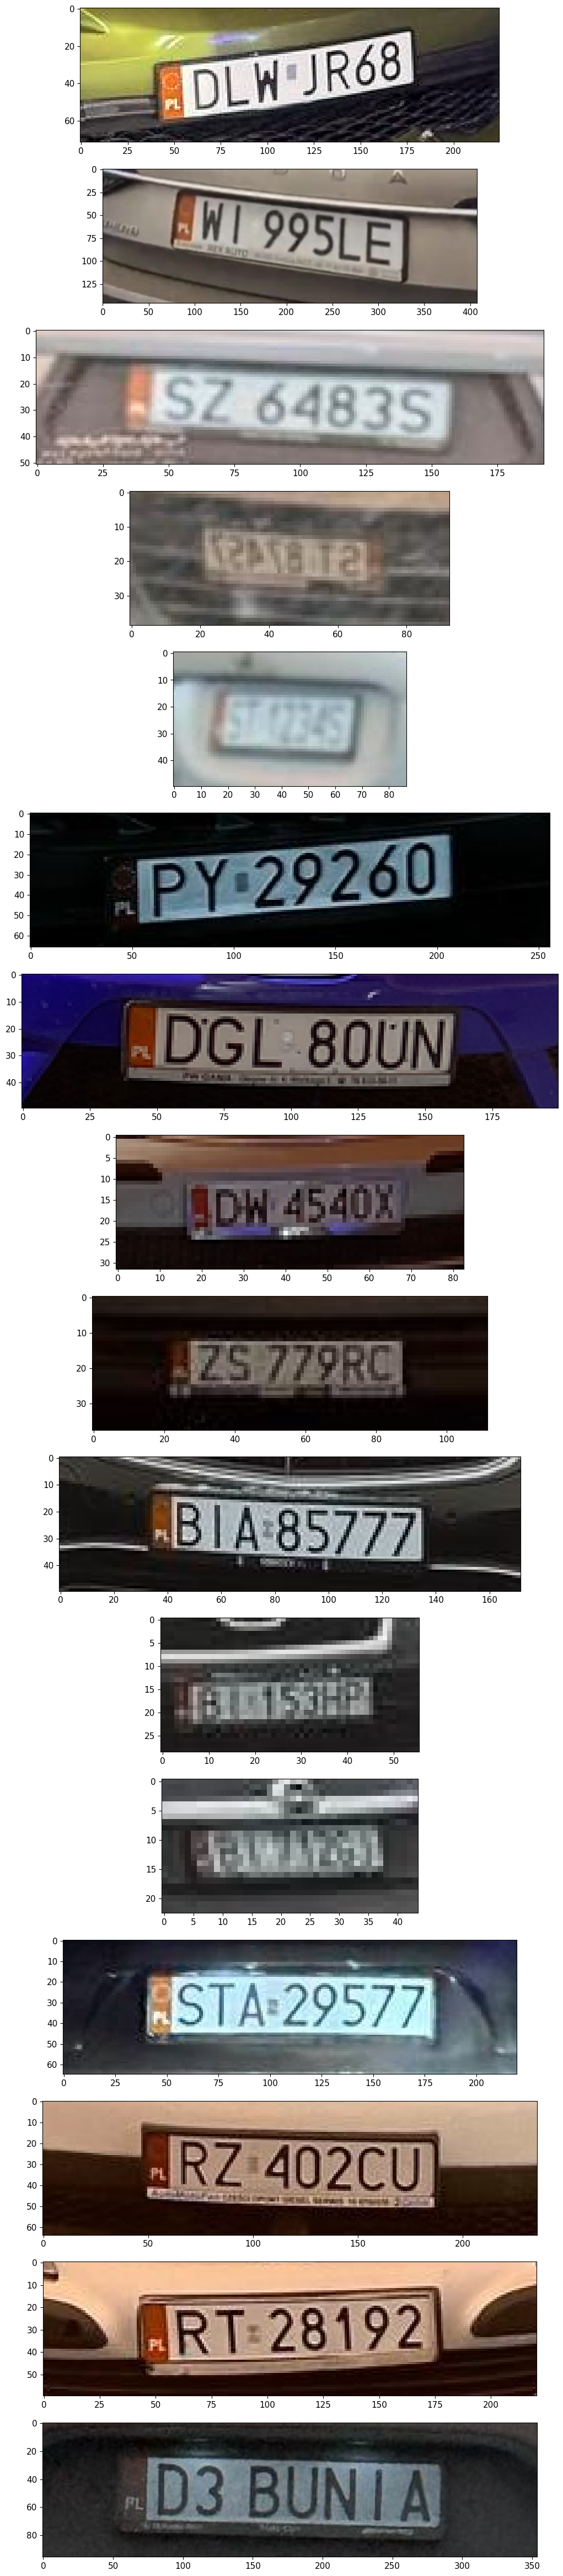

In [ ]:
skewed_plates = []


for image, res in zip(imagesLoaded, results):
    print(res.pred[0])
    predictions = res.pred[0]
    boxes = predictions[:, :4] # x1, y1, x2, y2
    scores = predictions[:, 4]
    categories = predictions[:, 5]

    for i, box in enumerate(boxes):
        box = [int(x) for x in box]
        x1, y1, x2, y2 = box
        #print(x1, y1, x2, y2)
        if(x1 > x2):
            x2, x1 = x1, x2
        if(y1 > y2):
            y2, y1 = y1, y2

        margin = 0.3
        w = x2 - x1 
        h = y2 - y1 
        dw = int(margin * w)
        dh = int(margin * h)


        x2 += dw 
        x1 -= dw

        y2 += dh
        y1 -= dh


        reg = image[y1:y2, x1:x2]

        #kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
        #reg = cv2.filter2D(reg, -1, kernel) 
        

        skewed_plates.append(reg.copy())


#boxes = np.matrix(boxes)
plt.rcParams["figure.figsize"] = (10, 10)
fig, axs = plt.subplots(len(skewed_plates))
for i, reg in enumerate(skewed_plates):
    #print(reg)
    axs[i].imshow(reg)

plt.show()




In [9]:
def flood_fill_with_tolerance(image, seed_point, tolerance):
    """
    Perform flood fill on an image based on RGB tolerance.

    Args:
        image (numpy.ndarray): Input image (BGR format).
        seed_point (tuple): Starting point (x, y) for flood fill.
        tolerance (tuple): Tolerance for (R, G, B) values.

    Returns:
        numpy.ndarray: Mask of the selected region (255 for selected, 0 otherwise).
    """
    # Convert image to float32 for calculations
    image = image.astype(np.float32)

    # Get the seed pixel value
    seed_value = image[seed_point[1], seed_point[0]]  # Note: OpenCV uses (y, x) indexing

    # Calculate lower and upper bounds for flood fill
    lower_bound = np.maximum(seed_value - tolerance, [0, 0, 0])
    upper_bound = np.minimum(seed_value + tolerance, [255, 255, 255])

    # Create a mask initialized to zeros
    mask = np.zeros((image.shape[0] + 2, image.shape[1] + 2), np.uint8)

    # Perform flood fill
    flood_fill_flags = 8 | cv2.FLOODFILL_MASK_ONLY | (255 << 8)
    cv2.floodFill(
        image,
        mask,
        seed_point,
        newVal=0,
        loDiff=tolerance,
        upDiff=tolerance,
        flags=flood_fill_flags
    )

    # Extract the relevant region from the mask (remove padding)
    return mask[1:-1, 1:-1]

In [10]:
plt.rcParams["figure.figsize"] = (120, 120)
fig, axs = plt.subplots(len(skewed_plates), 5)
print(len(skewed_plates))
enchanced = []


for i, plate in enumerate(skewed_plates):
    plate = plate.copy()
    plate2 = plate.copy()
    gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    h, w = plate.shape[:2]    
    ww, hh = int(0.1*w), int(0.1*h)
    xc, yc = w//2+5, h//2
    center = plate[yc-hh:yc+hh, xc-ww:xc+ww]
    grayCenter = cv2.cvtColor(center, cv2.COLOR_BGR2GRAY)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(grayCenter)
    #print(maxVal, maxLoc)
    maxLoc = list(maxLoc)
    maxLoc[0] += xc-ww
    maxLoc[1] += yc-hh
    cv2.circle(plate2, maxLoc, 1, (0,0,255), -1)

    
    mask = flood_fill_with_tolerance(plate, maxLoc, (10, 10, 10))

    #center = 
    
    axs[i, 0].imshow(plate2)
    axs[i, 1].imshow(center)
    axs[i, 2].imshow(mask)
    #axs[i, 3].imshow(thresh2, cmap='gray')
    #axs[i, 4].imshow(adjusted, cmap='gray')

16


In [10]:

fig, axs = plt.subplots(len(skewed_plates), 5)
print(len(skewed_plates))

enchanced = []

for i, plate in enumerate(skewed_plates):
    plate = plate.copy()
    gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    #plate = cv2.GaussianBlur(plate,(5,5),0)
    hsv_image = cv2.cvtColor(plate, cv2.COLOR_BGR2HSV)
    center = cv2.mean(plate)[0]
    d = 30
    low = center - d
    high = center + d   
    
    
    #mask = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    mask = cv2.cvtColor(plate, cv2.COLOR_RGB2GRAY)
    mask = cv2.inRange(mask, 0, center/1.2)
    #mask = cv2.bitwise_not(mask)
    #plate = cv2.bitwise_not(plate)
    #output = cv2.bitwise_or(plate, plate, mask = mask)
    blockSize = max(int(plate.shape[0] * plate.shape[1] / 200), 3)

    blockSize = blockSize if blockSize % 2 == 1 else blockSize +1
    print(blockSize)
    thresh2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv2.THRESH_BINARY, blockSize, 5) 
    
    adjusted = cv2.convertScaleAbs(plate, alpha=0.1, beta=0.8)

    # make output be binary version of plate
    output = np.zeros_like(plate)
    output = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    output[output > (center)] = 255
    output[output != 255] = 0



    enchanced.append(output)

    axs[i, 0].imshow(plate)
    axs[i, 1].imshow(mask, cmap='gray')
    axs[i, 2].imshow(output, cmap='gray')
    axs[i, 3].imshow(thresh2, cmap='gray')
    #axs[i, 4].imshow(adjusted, cmap='gray')


16
81
297
49
19
21
85
51
13
21
43
9
5
71
75
67
169


this was an attempt to select just the registration based on biggest contour

16


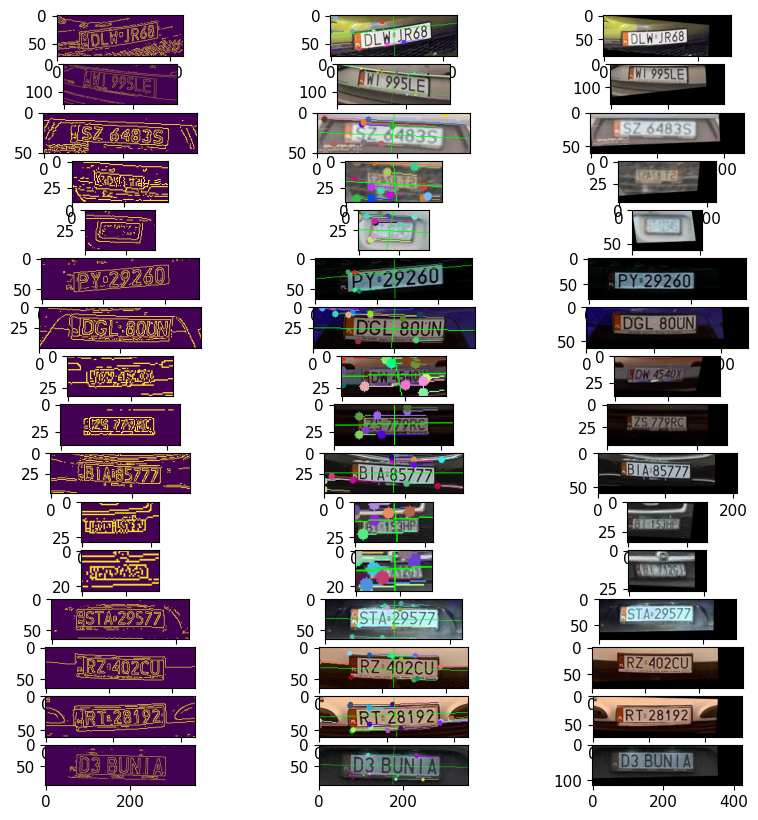

In [17]:

plt.rcParams["figure.figsize"] = (10, 10)
fig, axs = plt.subplots(len(skewed_plates), 3)
print(len(skewed_plates))
lsd = cv2.createLineSegmentDetector()


rots = []

deskewed = []

for i, plate in enumerate(skewed_plates):
    gray = plate.copy() # cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 128, 128)

    h, w = plate.shape[:2]
    lines = lsd.detect(edges)[0]

    drawn_image = np.copy(plate)        
    lowerLimit = 0.1 * w
    verticalLowerLimit = 0.1 * h
    
    lengthsAnglesPoints = []
    verticalLengthsAnglesPoints = []

    lengthSum = 0
    verticalLengthSum = 0

    for j, line in enumerate(lines):
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
        if(angle < 0):
            angle += 180
        
        length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        if(x1 > x2):
            x2, x1 = x1, x2
            y2, y1 = y1, y2


        color = tuple(np.random.randint(0, 255, 3).tolist())
        
        # this is for horizontal lines
        if length > lowerLimit and (angle < 10 or (angle < 180 and angle > 170)):
            lengthSum += length
            lengthsAnglesPoints.append((length, angle, [x1, y1, x2, y2]))
            cv2.line(drawn_image, (x1, y1), (x2, y2), color, 1)
            cv2.circle(drawn_image, (x1, y1), 4, color, -1)

        if length > verticalLowerLimit and (angle < 100 and angle > 80):
            verticalLengthSum += length
            verticalLengthsAnglesPoints.append((length, angle, [x1, y1, x2, y2]))
            #cv2.line(drawn_image, (x1, y1), (x2, y2), color, 1)
            #cv2.circle(drawn_image, (x1, y1), 4, color, -1)
        


        #elif(length > lowerLimit):
        #    print("angle", angle)


    falloff = 0
    verticalSkew = 0
    for j, (length, angle, (x1, y1, x2, y2)) in enumerate(lengthsAnglesPoints):
        importance = length / lengthSum
        fallCoeff = (y2 - y1) / (x2 - x1)
        falloff += importance * fallCoeff
    
    for j, (length, angle, (x1, y1, x2, y2)) in enumerate(verticalLengthsAnglesPoints):
        importance = length / verticalLengthSum
        fallCoeff = (x2 - x1) / (y2 - y1)
        verticalSkew += importance * fallCoeff

    x0, y0 = 0, h//2
    x1, y1 = w, h//2 + w * falloff
    cv2.line(drawn_image, (x0, y0), (int(x1), int(y1)), (0, 255, 0), 1)

    x0, y0 = w//2, 0
    x1, y1 = w//2 + h * verticalSkew, h
    cv2.line(drawn_image, (x0, y0), (int(x1), int(y1)), (0, 255, 0), 1)

    src = np.array([[0, 0], [w, +w*falloff], [w + h * verticalSkew, h + w*falloff], [h * verticalSkew, h]], dtype=np.float32)
    dst = np.array([[0, 0], [w, 0], [w, h], [0, h]], dtype=np.float32)

    M = cv2.getPerspectiveTransform(src, dst)
    warp = cv2.warpPerspective(plate, M, (int(w*1.2), int(h*1.2)))
    deskewed.append(warp)

    axs[i, 1].imshow(drawn_image)
    axs[i, 0].imshow(edges)
    axs[i, 2].imshow(warp)
    #axs[i, 2].imshow(drawn_image)
    
        


In [12]:
fig, axs = plt.subplots(len(skewed_plates), 3)
plt.rcParams["figure.figsize"] = (120, 120)

Gx = np.array([
    [-1, 0, 1], 
    [-2, 0, 2], 
    [-1, 0, 1]
])

Gy = np.array([
    [-1, -2, -1], 
    [ 0,  0,  0], 
    [ 1,  2,  1]
])


deskewed = []

for i, plate in enumerate(skewed_plates):
    plate2 = plate.copy()
    gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY).astype(np.float32)
    h, w = plate.shape[:2]
    gradient_y = cv2.filter2D(gray, -1, Gy)
    gradient_x = cv2.filter2D(gray, -1, Gx)
    gradient_magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))
    gradient_direction = np.arctan2(gradient_y, gradient_x)


    windowMargin=10
    Xwindow = [20-windowMargin, 20+windowMargin, 80-windowMargin, 80+windowMargin]
    Ywindow = [0, 100, 0, 100]
    Xwindow = [int(x * w / 100) for x in Xwindow]
    Ywindow = [int(x * h / 100) for x in Ywindow]
    
    # draw lines
    cv2.line(plate2, (Xwindow[0], 0), (Xwindow[0], h), (255, 0, 0), 1)
    cv2.line(plate2, (Xwindow[1], 0), (Xwindow[1], h), (255, 0, 0), 1)
    cv2.line(plate2, (Xwindow[2], 0), (Xwindow[2], h), (255, 0, 0), 1)
    cv2.line(plate2, (Xwindow[3], 0), (Xwindow[3], h), (255, 0, 0), 1)

    cv2.line(plate2, (0, Ywindow[0]), (w, Ywindow[0]), (0, 255, 0), 1)
    cv2.line(plate2, (0, Ywindow[1]), (w, Ywindow[1]), (0, 255, 0), 1)
    cv2.line(plate2, (0, Ywindow[2]), (w, Ywindow[2]), (0, 255, 0), 1)
    cv2.line(plate2, (0, Ywindow[3]), (w, Ywindow[3]), (0, 255, 0), 1)

    horizontalAngle = 0
    horizontalAngleIndex = 0
    verticalAngle = 0
    verticalAngleIndex = 0
    verticalAngleRight = 0
    verticalAngleRightIndex = 0

    threshold = 100

    verticalMargin = 5

    for x in range(w):
        for y in range(h):
            # left window
            if isInRange(x, Xwindow[0], Xwindow[1]):
                if gradient_magnitude[y, x] > threshold and (isInRange(gradient_direction[y, x], -verticalMargin*np.pi/180, verticalMargin*np.pi/180) or isInRange(gradient_direction[y, x], (180-verticalMargin)*np.pi/180, (180+verticalMargin)*np.pi/180)):
                    # convert data from gradient direction to non-numpy format
                    color = colorsys.hsv_to_rgb(float(gradient_direction[y, x])/np.pi, 1, 1)
                    #[print(type(i)) for i in color]
                    plate2[y, x] = [i*255 for i in color]
                    if(gradient_direction[y,x] > 90*np.pi/180):
                        gradient_direction[y,x] -= np.pi
                    verticalAngle += gradient_direction[y, x]*180/np.pi
                    verticalAngleIndex += 1

            # right window
            if(isInRange(x, Xwindow[2], Xwindow[3])):
                if gradient_magnitude[y, x] > threshold and (isInRange(gradient_direction[y, x], -verticalMargin*np.pi/180, verticalMargin*np.pi/180) or isInRange(gradient_direction[y, x], (180-verticalMargin)*np.pi/180, (180+verticalMargin)*np.pi/180)):
                    # convert data from gradient direction to non-numpy format
                    color = colorsys.hsv_to_rgb(float(gradient_direction[y, x])/np.pi, 1, 1)
                    #[print(type(i)) for i in color]
                    plate2[y, x] = [i*255 for i in color]
                    if(gradient_direction[y,x] > 90*np.pi/180):
                        gradient_direction[y,x] -= np.pi
                    verticalAngleRight += gradient_direction[y, x]*180/np.pi
                    verticalAngleRightIndex += 1



            # center window
            if(isInRange(x, Xwindow[1], Xwindow[2])):
                if gradient_magnitude[y, x] > threshold and isInRange(gradient_direction[y, x], 80*np.pi/180, 100*np.pi/180):
                    # convert data from gradient direction to non-numpy format
                    color = colorsys.hsv_to_rgb(float(gradient_direction[y, x])/np.pi, 1, 1)
                    #[print(type(i)) for i in color]
                    plate2[y, x] = [i*255 for i in color]
                    horizontalAngle += gradient_direction[y, x]*180/np.pi
                    horizontalAngleIndex += 1
    
    if(horizontalAngleIndex != 0):
        horizontalAngle /= horizontalAngleIndex
    else:
        horizontalAngle = 90

    if(verticalAngleIndex != 0):
        verticalAngle /= verticalAngleIndex
    else:
        verticalAngle = 0

    if(verticalAngleRightIndex != 0):
        verticalAngleRight /= verticalAngleRightIndex
    else:
        verticalAngleRight = 90


    print("horizontal angle", horizontalAngle)
    print("vertical angle", verticalAngle)

    # draw lines for horizontal and vertical angles
    x0, y0 = w//2, h//2
    x1, y1 = x0 + 100 * np.sin(horizontalAngle*np.pi/180), y0 - 100 * np.cos(horizontalAngle*np.pi/180)
    cv2.line(plate2, (x0, y0), (int(x1), int(y1)), (255, 0, 255), 2)

    x0, y0 = (Xwindow[0] + Xwindow[1])//2, h//2
    x1, y1 = x0 + 100 * np.sin(verticalAngle*np.pi/180), y0 - 100 * np.cos(verticalAngle*np.pi/180)
    cv2.line(plate2, (x0, y0), (int(x1), int(y1)), (255, 0, 255), 2)

    x0, y0 = (Xwindow[2] + Xwindow[3])//2, h//2
    x1, y1 = x0 + 100 * np.sin(verticalAngleRight*np.pi/180), y0 - 100 * np.cos(verticalAngleRight*np.pi/180)
    cv2.line(plate2, (x0, y0), (int(x1), int(y1)), (255, 255, 255), 2)



    axs[i, 0].imshow(gradient_magnitude)
    axs[i, 1].imshow(gradient_direction)
    axs[i, 2].imshow(plate2)

    
    #axs[i, 2].imshow(drawn_image)

horizontal angle 85.95923531387999
vertical angle -1.9559446387686124
horizontal angle 95.179426834167
vertical angle 0.03081476462236689
horizontal angle 92.35270633685606
vertical angle 0.3499266642515335
horizontal angle 90.63988913260981
vertical angle 1.2306235847836122
horizontal angle 92.55140657525502
vertical angle 0.11309903995299443
horizontal angle 86.81597336008343
vertical angle -0.884311826982482
horizontal angle 90.57685732988053
vertical angle 1.6563038371030407
horizontal angle 90.16676085409674
vertical angle -1.48753076869945
horizontal angle 90.16355080108923
vertical angle -0.028326463682222358
horizontal angle 91.85955868840678
vertical angle -0.6168343320586683
horizontal angle 87.59130659719852
vertical angle 0.8057079698912315
horizontal angle 88.47341595139257
vertical angle 1.428538066972134
horizontal angle 90.37011768560774
vertical angle 0.1408197520536111
horizontal angle 91.1619403013134
vertical angle -0.8320832007582617
horizontal angle 89.03161970574

/home/jur/.local/lib/python3.12/site-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/jur/.local/lib/python3.12/site-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/jur/.local/lib/python3.12/site-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/jur/.local/lib/python3.12/site-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/jur/.local/lib/python3.12/site-packages/yolov5/models/common.py:709: FutureWar

14


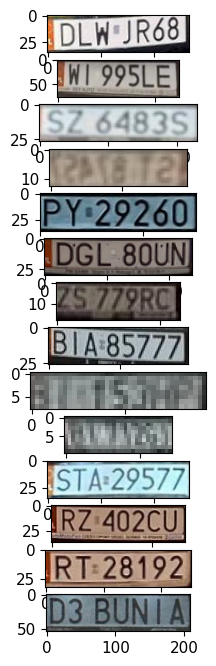

In [29]:
ONLY_PLATES = []
plt.rcParams["figure.figsize"] = (8,8)

for image in deskewed:
    res = model(image, size=640)
    predictions = res.pred[0]
    boxes = predictions[:, :4] # x1, y1, x2, y2
    scores = predictions[:, 4]
    categories = predictions[:, 5]

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = [int(x) for x in box]
        if(x1 > x2):
            x2, x1 = x1, x2
        if(y1 > y2):
            y2, y1 = y1, y2

        margin = 0.0
        w = x2 - x1 
        h = y2 - y1 
        dw = int(margin * w)
        dh = int(margin * h)


        x2 += dw 
        x1 -= dw

        y2 += dh
        y1 -= dh

        x1 += (x2-x1)*0.05
        x1 = int(x1)

        reg = image[y1:y2, x1:x2]
        ONLY_PLATES.append(reg.copy())


print(len(ONLY_PLATES))

#boxes = np.matrix(boxes)

fig, axs = plt.subplots(len(ONLY_PLATES))
for i, reg in enumerate(ONLY_PLATES):
    #print(reg)
    axs[i].imshow(reg)

plt.show()




['DLH J68']
['MI P95LE']
['ISZ 64835]']
[]
['PY 2926']
['DGL 8OUN']
['257790']
['BIA 8577']
[]
[]
['STA29577']
['RZ 402CU)']
['RL28192']
['D3 BUMA']


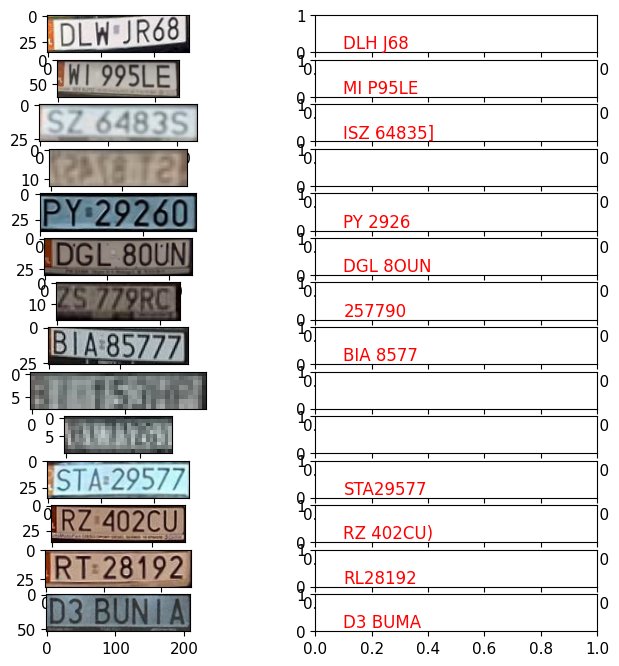

In [21]:
import easyocr
plt.rcParams["figure.figsize"] = (8,8)
fig, axs = plt.subplots(len(ONLY_PLATES), 2)
reader = easyocr.Reader(['en'])
for i, plate in enumerate(ONLY_PLATES):
    plate = plate.copy()
    #plate = cv2.GaussianBlur(plate,(7,7),0)
    ocr_result = reader.readtext(plate, detail=0)
    print(ocr_result)
    #print("Recognized Text:", ' '.join(ocr_result))
    axs[i, 0].imshow(plate)
    axs[i, 1].text(0.1, 0.1, ' '.join(ocr_result), fontsize=12, color='red')   

In [23]:
import pytesseract # this is tesseract module 
import matplotlib.pyplot as plt 
import cv2 # this is opencv module 
import glob 
import os

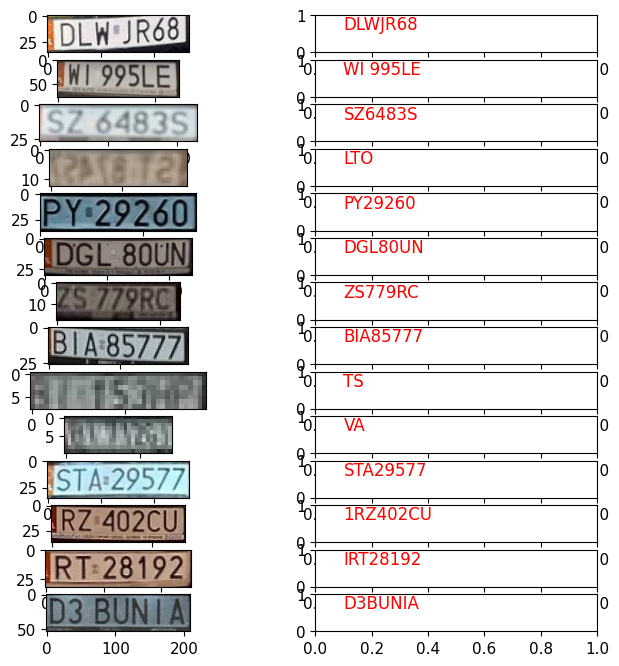

In [30]:
plt.rcParams["figure.figsize"] = (8,8)
fig, axs = plt.subplots(len(ONLY_PLATES), 2)
for i, plate in enumerate(ONLY_PLATES):
    #plate = cv2.GaussianBlur(plate,(3,3),0)
    predicted_result = pytesseract.image_to_string(plate, lang ='eng', 
    config ='--oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"') 
    
    axs[i, 0].imshow(plate)
    axs[i, 1].text(0.1, 0.05 , predicted_result, fontsize=12, color='red')  

The image is not blurry, Laplacian operator variance: 5687.582014603796
The image is not blurry, Laplacian operator variance: 277.7800909194745
The image is not blurry, Laplacian operator variance: 525.5736764503774
The image is not blurry, Laplacian operator variance: 865.1331360946747
The image is not blurry, Laplacian operator variance: 2190.1375179742804
The image is not blurry, Laplacian operator variance: 3170.282350116517
The image is not blurry, Laplacian operator variance: 3489.4894513031554
The image is not blurry, Laplacian operator variance: 10852.41808886337
The image is not blurry, Laplacian operator variance: 5496.006535664819
The image is not blurry, Laplacian operator variance: 8224.029120095125
The image is not blurry, Laplacian operator variance: 2637.9567671365003
The image is not blurry, Laplacian operator variance: 4269.641610107862
The image is not blurry, Laplacian operator variance: 5370.00082056839
The image is not blurry, Laplacian operator variance: 675.7671

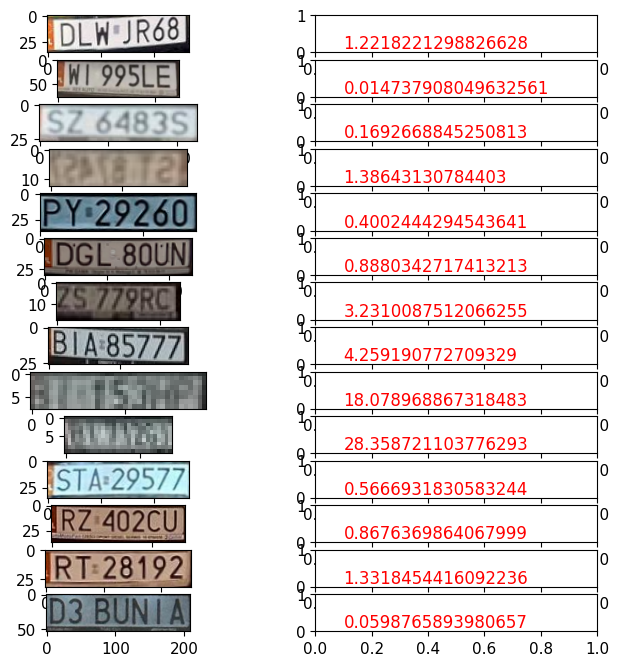

In [32]:
def laplacian_score(image):
    # Convert to grayscale image.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Perform edge detection using the Laplace operator.
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    # Calculate the variance of the Laplace operator.
    variance = laplacian.var()
    # Set the threshold
    threshold = 100
    # Determine whether the image is blurry.
    if variance > threshold:
        print("The image is not blurry, Laplacian operator variance:", variance)
    else:
        print("The image is blurry, Laplacian operator variance:", variance)
    return variance

fig, axs = plt.subplots(len(ONLY_PLATES), 2)
for i, plate in enumerate(ONLY_PLATES):
    plate = plate.copy()

    axs[i, 0].imshow(plate)
    axs[i, 1].text(0.1, 0.1, str(laplacian_score(plate)/(plate.shape[0] * plate.shape[1])), fontsize=12, color='red')   